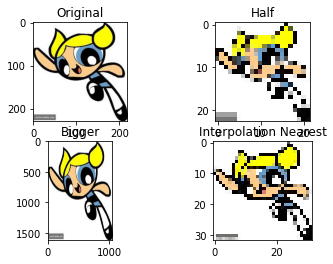

In [8]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
# %matplotlib qt 
# This is a magic command to display in an external window 
  
image = cv2.imread("powerpuff/bubbles/1.jpeg", 1)
b,g,r = cv2.split(image)
rgb_img1 = cv2.merge([r,g,b])

half = cv2.resize(rgb_img1, (0, 0), fx = 0.1, fy = 0.1) 
bigger = cv2.resize(rgb_img1, (1050, 1610))

  
stretch_near = cv2.resize(rgb_img1, (32, 32),
               interpolation = cv2.INTER_NEAREST) 

Titles =["Original", "Half", "Bigger", "Interpolation Nearest"] 
images =[rgb_img1, half, bigger, stretch_near] 
count = 4
  
for i in range(count): 
    plt.subplot(2, 2, i + 1) 
    plt.title(Titles[i]) 
    plt.imshow(images[i]) 

plt.show() 


In [57]:
import os

blossom, bubbles, buttercup = [], [], []

for i in os.listdir('powerpuff/blossom'):
    image = cv2.imread(f'powerpuff/blossom/{i}', 3)
    b,g,r = cv2.split(image)
    rgb_img1 = cv2.merge([r,g,b])
    stretch_near = cv2.resize(rgb_img1, (32, 32),  
                   interpolation = cv2.INTER_NEAREST)
    blossom.append(stretch_near)

for i in os.listdir('powerpuff/bubbles'):
    image = cv2.imread(f'powerpuff/bubbles/{i}', 3)
    b,g,r = cv2.split(image)
    rgb_img1 = cv2.merge([r,g,b])
    stretch_near = cv2.resize(rgb_img1, (32, 32),  
                   interpolation = cv2.INTER_NEAREST)
    bubbles.append(stretch_near)

for i in os.listdir('powerpuff/buttercup'):
    image = cv2.imread(f'powerpuff/buttercup/{i}', 3)
    b,g,r = cv2.split(image)
    rgb_img1 = cv2.merge([r,g,b])
    stretch_near = cv2.resize(rgb_img1, (32, 32),  
                   interpolation = cv2.INTER_NEAREST)
    buttercup.append(stretch_near)


In [10]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [58]:
X = [blossom, buttercup, bubbles]
y = [[1] for _ in blossom] + [[2] for _ in buttercup] + [[3] for _ in bubbles]
X = np.concatenate(X)
y = np.concatenate(y)


In [59]:
X = X.astype('float32')
X = X / 255.0
X.shape[1:]

(32, 32, 3)

In [60]:
y = np_utils.to_categorical(y)


In [61]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), input_shape=(4, 32, 32), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(4))
model.add(Activation('softmax'))


In [62]:
epochs = 25
optimizer = 'adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 64)       

In [63]:
model.fit(X, y, epochs=epochs, batch_size=64)

Epoch 1/25
2/2 [==============================] - 0s 8ms/step - loss: 2.3713 - accuracy: 0.2206
Epoch 2/25
2/2 [==============================] - 0s 6ms/step - loss: 0.7173 - accuracy: 0.7206
Epoch 3/25
2/2 [==============================] - 0s 6ms/step - loss: 0.3490 - accuracy: 0.8529
Epoch 4/25
2/2 [==============================] - 0s 6ms/step - loss: 0.3974 - accuracy: 0.8235
Epoch 5/25
2/2 [==============================] - 0s 6ms/step - loss: 0.3295 - accuracy: 0.8382
Epoch 6/25
2/2 [==============================] - 0s 6ms/step - loss: 0.2205 - accuracy: 0.9265
Epoch 7/25
2/2 [==============================] - 0s 7ms/step - loss: 0.1453 - accuracy: 0.9265
Epoch 8/25
2/2 [==============================] - 0s 6ms/step - loss: 0.0694 - accuracy: 0.9706
Epoch 9/25
2/2 [==============================] - 0s 7ms/step - loss: 0.1242 - accuracy: 0.9559
Epoch 10/25
2/2 [==============================] - 0s 7ms/step - loss: 0.0914 - accuracy: 0.9559
Epoch 11/25
2/2 [======================

In [18]:
gate = {
    1: 'blossom',
    2: 'buttercup',
    3: 'bubbles'
}

In [68]:
pictures = ['blossom.png', 'bubbles.png', 'buttercup.png']

for img_path in pictures:
    image = cv2.imread(img_path, 3) 
    sample = cv2.resize(image, (32, 32),  
                   interpolation = cv2.INTER_NEAREST)
    b,g,r = cv2.split(sample)
    sample = cv2.merge([r,g,b])

    sample = np.concatenate([[sample]])
    sample = sample.astype('float32')
    sample = sample / 255.0

    sample.shape[1:]
    yh = np.argmax(model.predict(sample), axis=1)[0]
    print(gate[yh])

blossom
bubbles
buttercup


In [16]:
gate[yh]

'blossom'